# Titanic_MachineLearning_from_Disaster

Task : use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Competition url : https://www.kaggle.com/c/titanic

## Data Preparation

In [ ]:
# Setting the data path
dataPath = "./data/"  
!ls data/

gender_submission.csv  test.csv  train.csv


In [ ]:
# Importing libraries for data processing
import re
import shelve
import pandas as pd
from sklearn.impute import KNNImputer

In [ ]:
df_train = pd.read_csv(dataPath+"train.csv",encoding="latin-1",low_memory=False)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Functions for Data Preparation

In [ ]:
def df_transform_name(df, codification):
    
    """ This is a function to perform a transformation of the column Name based on a codification.
        Specifically, it transforms a name into a number depending of its title name
        For example: 
            Braund, Mr. Owen Harris --> 1
            Futrelle, Mrs. Jacques Heath (Lily May Peel) --> 2
    
    Args:
        df (Pandas DataFrame): dataframe
        codification (dict): the mapping name to code number
    return:
        df (Pandas DataFrame): column title added to dataframe
    """
    
    regex = "\.|".join(list(codification.keys())[:-1])+"\." # get the regex to match titles
    
    def getTitle(name):
        title = re.findall(regex,name)
        
        if title:
            title = title[0][0:-1]
            return codification.get(title,0)
        else:
            return codification["Other"]
        
    df["Title_Name"] = df.Name.apply(lambda name: getTitle(name))

In [ ]:
def missing_values(data,col,features,n_neighbors=5,weights='uniform',metric='nan_euclidean',**kwargs):
    
    """ This is a function to impute missing values with k-nearest neighbors.
        In order to do the inputation, it must choose the column and features 
        with numerical values.
    
    Args:
        data (Pandas DataFrame): dataframe
        col (string): column to input missing values
        features [list[string]]: features of k-nearest neighbors
        n_neighbors (int): number of neighbors
        weights (string): weight for each feature
        metric (string): metric to use
    return:
        data (Pandas DataFrame): inputed column added to dataframe
    
    """
        
    imputer = KNNImputer(n_neighbors=n_neighbors, weights=weights, metric=metric,**kwargs)
    
    features = [col] + features
        
    X = data[features]    
    y = data[col]
    
    X = X[features]
    
    data[col] = imputer.fit_transform(X, y)

In [ ]:
def object_to_categorical_or_numerical(df,col,order=None,toCode=True):
    
    """ This is a function to convert an object columns to categorical or numerical column
    
    Args:
        df (Pandas DataFrame): dataframe
        col (string): column to cast
        order (tuple): order of the categories
        toCode (bool): if true return the code of the categories
    return:
        df (Pandas DataFrame): inputed column added to dataframe
    
    """
    
    df[col] = df[col].astype("category")
    if order:
        df[col].cat.set_categories(order,ordered=True,inplace=True)
    
    if toCode:
        df[col] = df[col].cat.codes

### Feature Engineering

In [ ]:
df_train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
# Condification of title name of each person
codification_title = {"Mr": 1,
                "Mrs" : 2,
                "Miss" : 3,
                "Master" : 4,
                "Rev" : 5,
                "Dr" : 6,
                "Other": 7}

df_transform_name(df_train,codification_title)
df_train[["Name","Title_Name","Sex"]].head()

,Name,Title_Name,Sex
0,"Braund, Mr. Owen Harris",1,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,female
2,"Heikkinen, Miss. Laina",3,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,female
4,"Allen, Mr. William Henry",1,male


In [ ]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# lets cast object columns to categorical
object_to_categorical_or_numerical(df_train, "Sex")
object_to_categorical_or_numerical(df_train, "Embarked") 

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,5
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,1


### Missing values and syntetic features

In [ ]:
# missing values
null_features = df_train.isnull().sum()
null_features = null_features[null_features != 0]
null_features

Age      177
Cabin    687
dtype: int64

In [ ]:
df_train["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [ ]:
# Dropping Cabin, PassengerId, Name and Ticket
df_train.drop(["Cabin","PassengerId","Name","Ticket"],axis=1,inplace=True)

In [ ]:
# using Pclass, Parch, Fare, Sex, Survived and Title_Name to predict Age
missing_values(df_train,'Age',['Survived', 'Pclass', 'Sex', 'Parch', 'Fare', 'Title_Name'],
                   n_neighbors=5,weights='uniform',metric='nan_euclidean')
    
# using Pclass, Fare, Sex, Survived and Title_Name to predict embarked
missing_values(df_train,'Embarked',['Survived', 'Pclass', 'Sex', 'Fare', 'Title_Name'],
               n_neighbors=5,weights='uniform',metric='nan_euclidean', missing_values=-1)

In [ ]:
# missing values with inputed knn
null_features = df_train.isnull().sum()
null_features = null_features[null_features != 0]
null_features

Series([], dtype: int64)

In [ ]:
# Lets building syntetic features ()
df_train["SibPar"] = df_train["SibSp"]*df_train["Parch"]
    
# Lets build a syntetic feature 
child_age = df_train[df_train.Title_Name.isin([4])]["Age"].quantile([0.75]).values[0]

# 0 WOMAN
cond = (df_train.Age <= child_age) | (df_train.Sex == 0)
df_train["IsChildWoman"] = cond*1

In [ ]:
child_age

8.25

In [ ]:
# Final dataframe
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Name,SibPar,IsChildWoman
0,0,3,1,22.0,1,0,7.2500,2.0,1,0,0
1,1,1,0,38.0,1,0,71.2833,0.0,2,0,1
2,1,3,0,26.0,0,0,7.9250,2.0,3,0,1
3,1,1,0,35.0,1,0,53.1000,2.0,2,0,1
4,0,3,1,35.0,0,0,8.0500,2.0,1,0,0


### Data pipeline for test set 

In [ ]:
def data_pipline_test(df, colsMust, codification_title):
  """
  This function is a data pipeline for test data
  
  Args:
      df (Pandas DataFrame): dataframe of test data
      colsMust (set): tuple of columns must has df
  return:
      df (Pandas DataFrame): df transformed
  """

  # Condification of title name of each person
  df_transform_name(df,codification_title)

  # Lets building syntetic features
  df["SibPar"] = df["SibSp"]*df["Parch"]
  child_age = df[df.Title_Name.isin([4])]["Age"].quantile([0.75]).values[0]
  # 0 WOMAN
  cond = (df.Age <= child_age) | (df.Sex == 0)
  df["IsChildWoman"] = cond*1

  # lets cast object columns to categorical
  object_to_categorical_or_numerical(df, "Sex")
  object_to_categorical_or_numerical(df, "Embarked") 

  # Dropping Cabin, PassengerId, Name and Ticket
  df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1,inplace=True)

  assert set(df.columns) == colsMust, "colMust does not have the same columns as df"

In [ ]:
df_test = pd.read_csv(dataPath+"test.csv",encoding="latin-1",low_memory=False)
sunmission = pd.read_csv(dataPath+"gender_submission.csv",encoding="latin-1",low_memory=False)
df_test = df_test.merge(sunmission, how = "inner", on = "PassengerId")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
# Forward to data pipeline
colsMust = set(df_train.columns)
data_pipline_test(df_test, colsMust, codification_title)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title_Name,SibPar,IsChildWoman
0,3,1,34.5,0,0,7.8292,1,0,1,0,0
1,3,0,47.0,1,0,7.0000,2,1,2,0,0
2,2,1,62.0,0,0,9.6875,1,0,1,0,0
3,3,1,27.0,0,0,8.6625,2,0,1,0,0
4,3,0,22.0,1,1,12.2875,2,1,2,1,0


## Machine Learning (Random Forest)

In [ ]:
# Importing libraries for machine learning
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

### Splitting the data

In [ ]:
x_data, y_data = df_train.drop(["Survived"],axis=1), df_train["Survived"] 

In [ ]:
# Split train and validation set (20% of validation)
test_size = 0.2
random_state = 643
x_train, x_val, y_train, y_val = train_test_split(x_data,y_data, 
                                                  test_size = test_size,
                                                  random_state = random_state)

In [ ]:
df_test.isnull().sum()

Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Embarked         0
Survived         0
Title_Name       0
SibPar           0
IsChildWoman     0
dtype: int64

In [ ]:
df_test.dropna(inplace = True)

In [ ]:
x_test, y_test = df_test.drop(["Survived"],axis=1), df_test["Survived"] 

### Functions for Machine Learning

In [ ]:
def accuracy(model,x,y):
    """
    Function to compute accuracy
    """
    y_pred = model.predict(x)
    return (y_pred==y).mean()

In [ ]:
def random_forest(x,y,
                  n_estimators=60, max_samples = 100,max_features=0.5,
                  min_samples_leaf=3,oob_score=True,n_jobs=-1,**kwargs):
  
    """
    Function to define and train a random forest classifier
    """  
    return RandomForestClassifier(n_estimators=n_estimators, 
                                    max_samples=max_samples,max_features=max_features,
                                    min_samples_leaf=min_samples_leaf,oob_score=oob_score,
                                    n_jobs=n_jobs,**kwargs).fit(x,y)

In [ ]:
def f_importances_model(model,df):
    """
    Function to get importance features of a random forest classifier
    """
    return pd.DataFrame({"cols":df.columns,"imp":model.feature_importances_}
                                ).sort_values("imp",ascending=False)  

In [ ]:
def plot_f_importance_model(fi,title,figsize=(12,7),save=False,**kwargs):
    """
    Function to plot the importance features
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_ylabel("Columns")
    ax.set_xlabel("Importance")
    fig.suptitle(title)
    ax.barh(fi["cols"],fi["imp"],**kwargs)
    if save:
        plt.savefig('./reports/{}.png'.format(title), dpi = 300)

In [ ]:
def plot_tree_(Decission_Tree1,feature_names,figsize,max_depth=7,precision=2,save=False,**kwargs):
    """
    Function to plot a tree
    """
    fig, ax = plt.subplots(figsize=figsize)
    plot_tree(Decission_Tree1,feature_names=feature_names,max_depth=7,precision=2,ax=ax,**kwargs)
    if save:
        plt.savefig('./reports/Decission_tree.png', dpi = 300)

In [ ]:
def get_oob(x,y):
    model = RandomForestClassifier(n_estimators=60,
                                    max_samples=100,max_features=0.5,
                                    min_samples_leaf=3,oob_score=True,n_jobs=-1)
    
    """
    Function to get a oob score of random forest naive
    """
    model.fit(x,y)
    return round(model.oob_score_, 2)

In [ ]:
def getDendrogram(x,title,figsize=(12,7),metric='correlation',method='complete',orientation="left",save=False,**kwargs):
    """
    Functions to get a dendogram
    """
    x_t = x.T
    c_dist = pdist(x_t) # compute the distance
    c_link = linkage(x_t,  metric='correlation', method='complete')# computing the linkage
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(title)
    dendrogram(c_link,labels=list(x_train_Parch.columns),orientation="left",ax=ax,**kwargs)
    if save:
        plt.savefig('./reports/Dendogram_{}.png'.format(title), dpi = 300)

In [ ]:
def plot_partial_dependence_(model,title,x,features,figsize=(12,7),save=False,**kwargs):
    """
    Function to plot partial dependences
    """
    fig, ax = plt.subplots(figsize=figsize)
    plot_partial_dependence(model,x,features,grid_resolution=20,ax=ax,**kwargs)
    fig.suptitle(title)
    if save:
        plt.savefig('./reports/partial_dependence_{}.png'.format(title), dpi = 300)

### Decission Tree 

Decission Tree 1 : Train ACCU : 0.844
Decission Tree 1 : Valid ACCU : 0.82


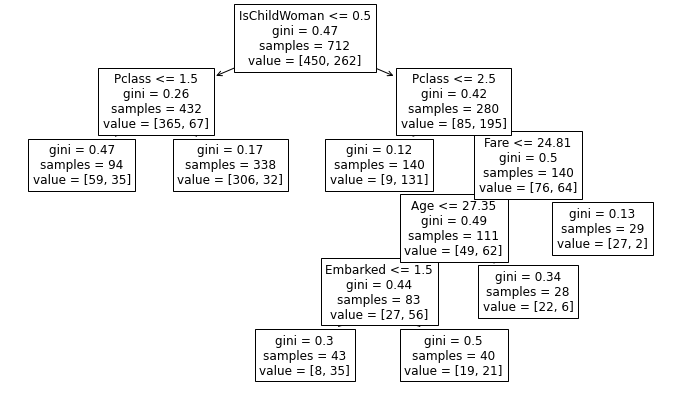

In [ ]:
# Lets train and evaluate the first Decision Tree 
Decission_Tree1 = DecisionTreeClassifier(max_leaf_nodes=7)
Decission_Tree1.fit(x_train,y_train)
    
# Visualization of the first desicion tree
feature_names = x_train.columns
figsize=(12,7)
plot_tree_(Decission_Tree1,feature_names,figsize,save=False)
    
accT_DT_1 = accuracy(Decission_Tree1,x_train,y_train)
accV_DT_1 = accuracy(Decission_Tree1,x_val,y_val)
print("Decission Tree 1 : Train ACCU : {:.3f}".format(accT_DT_1))
print("Decission Tree 1 : Valid ACCU : {:.2f}".format(accV_DT_1))    

### First Random Forest

In [ ]:
# Lets Train and evaluate the first random forest
max_samples = int(len(y_train)*0.7)
Random_Forest1 = random_forest(x_train,y_train,max_samples=max_samples,class_weight="balanced_subsample")
    
accT_RF_1 = accuracy(Random_Forest1,x_train,y_train)
accV_RF_1 = accuracy(Random_Forest1,x_val,y_val)
print("Random Forest 1 : Train ACCU : {:.3f}".format(accT_RF_1))
print("Random Forest 1 : Valid ACCU : {:.3f}".format(accV_RF_1))

Random Forest 1 : Train ACCU : 0.907
Random Forest 1 : Valid ACCU : 0.821


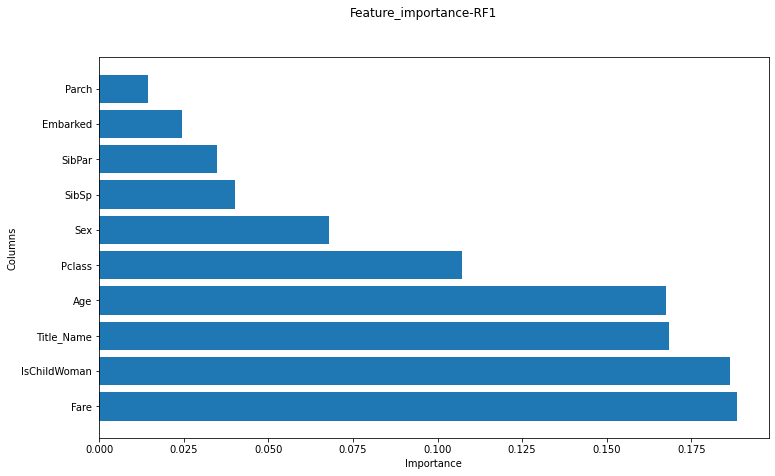

In [ ]:
# Feature importance
f_importance_rf1 = f_importances_model(Random_Forest1, x_train)
f_importance_rf1    
    
# plot the importance features of Random Forest 1
title = "Feature_importance-RF1"
plot_f_importance_model(f_importance_rf1,title,save=False)

In [ ]:
# Lets remove low important features
# As it can see, Parch feature has 0.008801 of importance, in relation 
# with the other features, it is low value, we drop it. 
x_train_Parch = x_train.drop(["Parch"],axis=1)
x_val_Parch = x_val.drop(["Parch"],axis=1)

### Second Random Forest

In [ ]:
# Lets Train and evaluate the second random forest
Random_Forest2 = random_forest(x_train_Parch,y_train,max_samples=max_samples,class_weight="balanced_subsample")
    
accT_RF_2 = accuracy(Random_Forest2,x_train_Parch,y_train)
accV_RF_2 = accuracy(Random_Forest2,x_val_Parch,y_val)
print("Random Forest 2 : Train ACCU : {:.3f}".format(accT_RF_2))
print("Random Forest 2 : Valid ACCU : {:.3f}".format(accV_RF_2))

Random Forest 2 : Train ACCU : 0.907
Random Forest 2 : Valid ACCU : 0.827


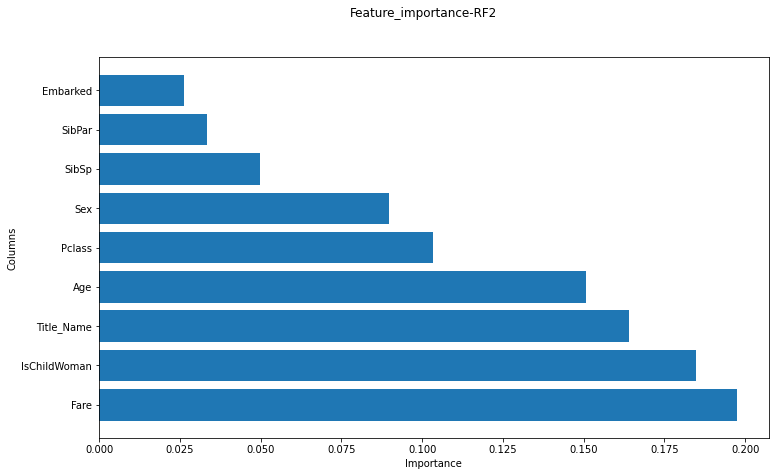

In [ ]:
# Check the importance features
f_importance_rf2 = f_importances_model(Random_Forest2, x_train_Parch)
f_importance_rf2    
    
# plot the importance features of random forest 2
title = "Feature_importance-RF2"
plot_f_importance_model(f_importance_rf2,title,save=False)

### Dendogram of training data

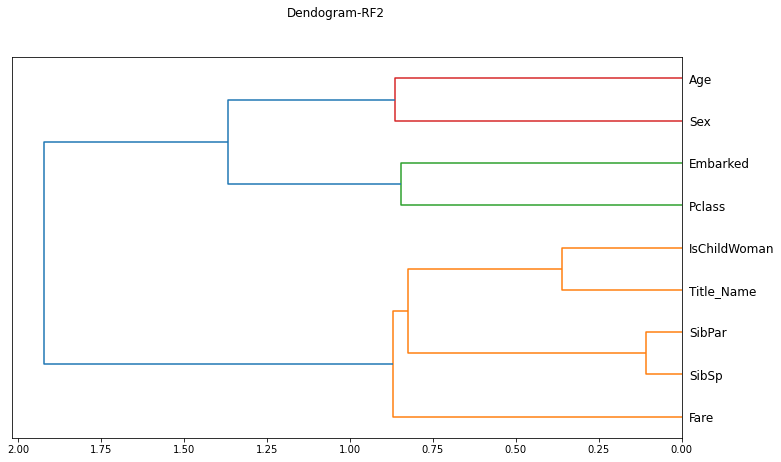

In [ ]:
# Lets remove Redundant Features
title = "Dendogram-RF2"
getDendrogram(x_train_Parch,title,save=False)

In [ ]:
# Lets check out SibPar and SibSp and their effect in performance
origin = get_oob(x_train, y_train)
print("Random Forest 2 : oob score - Full features : {}".format(origin))

# get oob score erasing SibPar and SibSp
obb_scores = {"obb score without " + col:get_oob(x_train.drop(col,axis=1)
              , y_train) for col in ("SibPar","SibSp")}
print(obb_scores)

Random Forest 2 : oob score - Full features : 0.83
{'obb score without SibPar': 0.82, 'obb score without SibSp': 0.83}


In [ ]:
# removing SibSp, it almost has the same performance.
x_train_SibPar =  x_train.drop(["SibSp"],axis=1)
x_val_SibPar = x_val.drop(["SibSp"],axis=1)

### Third Random Forest

In [ ]:
# Lets Train and evaluate the third random forest
Random_Forest3 = random_forest(x_train_SibPar,y_train,max_samples=max_samples
                              ,class_weight="balanced_subsample")
    
accT_RF_3 = accuracy(Random_Forest3,x_train_SibPar,y_train)
accV_RF_3 = accuracy(Random_Forest3,x_val_SibPar,y_val)
print("Random Forest 3 : Train ACCU : {:.3f}".format(accT_RF_3))
print("Random Forest 3 : Valid ACCU : {:.3f}".format(accV_RF_3))

Random Forest 3 : Train ACCU : 0.907
Random Forest 3 : Valid ACCU : 0.838


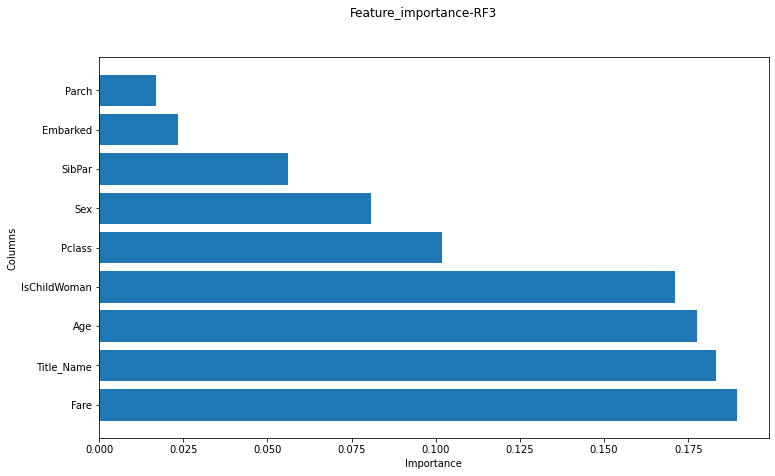

In [ ]:
# we observe the performance improve for training
f_importance_rf3 = f_importances_model(Random_Forest3, x_train_SibPar)
# plot the importance features of random forest 3
title = "Feature_importance-RF3"
plot_f_importance_model(f_importance_rf3,title,save=False)

### Analysing Data Lakage - Third Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


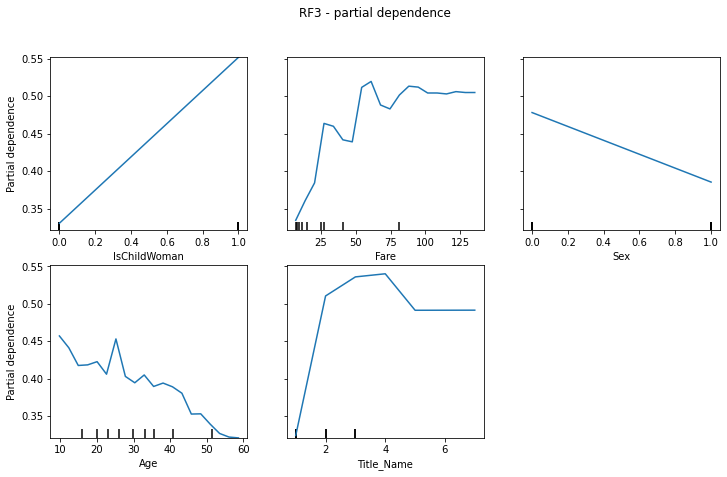

In [ ]:
title = "RF3 - partial dependence"
features = ["IsChildWoman","Fare","Sex","Age","Title_Name"]
plot_partial_dependence_(Random_Forest3,title,x_val_SibPar,features,save=False)

df_train[["Ticket","Ticket-code"]].head()df_train[["Ticket","Ticket-code"]].head()df_train[["Ticket","Ticket-code"]].head()df_train[["Ticket","Ticket-code"]].head()df_train[["Ticket","Ticket-code"]].head()cdf_train[["Ticket","Ticket-code"]].head()df_train[["Ticket","Ticket-code"]].head()df_train[["Ticket","Ticket-code"]].head()df_train[["Ticket","Ticket-code"]].head()### Testing - Kaggle

In [ ]:
colsMuest = x_val_SibPar.columns
x_test = x_test[colsMuest]

In [ ]:
accT_RF_3 = accuracy(Random_Forest3,x_train_SibPar,y_train)
accV_RF_3 = accuracy(Random_Forest3,x_val_SibPar,y_val)
accTest_RF_3 = accuracy(Random_Forest3,x_test,y_test)
print("Random Forest 3 : Train ACCU : {:.3f}".format(accT_RF_3))
print("Random Forest 3 : Valid ACCU : {:.3f}".format(accV_RF_3))
print("Random Forest 3 : Test ACCU : {:.3f}".format(accTest_RF_3))

Random Forest 3 : Train ACCU : 0.907
Random Forest 3 : Valid ACCU : 0.838
Random Forest 3 : Test ACCU : 0.825


### Hyperparameters (rf3)


In [ ]:
hyperparameters = Random_Forest3.get_params()
hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.5,
 'max_leaf_nodes': None,
 'max_samples': 498,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model = RandomForestClassifier(**hyperparameters)

In [ ]:
model

RandomForestClassifier(class_weight='balanced_subsample', max_features=0.5,
                       max_samples=498, min_samples_leaf=3, n_estimators=60,
                       n_jobs=-1, oob_score=True)

### Saving the data


In [ ]:
data_train = pd.concat([x_train_SibPar,y_train], axis = 1)
data_validation = pd.concat([x_val_SibPar,y_val], axis = 1)
trainValidation = pd.concat([data_train,data_validation], axis = 0)

In [ ]:
trainValidation.to_csv(dataPath + "trainValidation_clean.csv", index = False)
pd.concat([x_test,y_test],axis = 1).to_csv(dataPath + "test_clean.csv", index = False)